In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

C:\Users\Windows\AppData\Local\Temp\ipykernel_18968\4070788826.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### T2

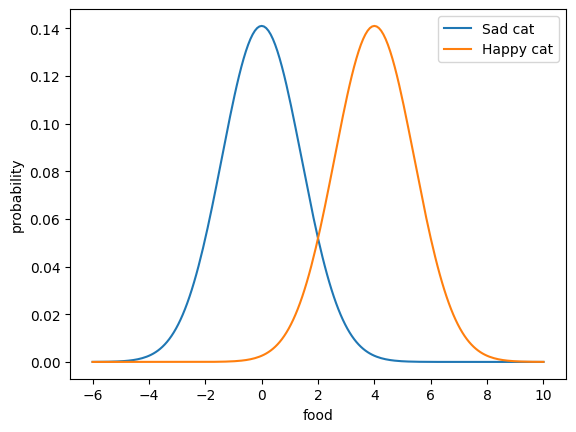

Decision boundary is at x = 2.0


In [2]:
x = np.linspace(-6, 10, 201)
plt.plot(x, norm.pdf(x, 0, np.sqrt(2))*0.5)
plt.plot(x, norm.pdf(x, 4, np.sqrt(2))*0.5)
plt.xlabel('food')
plt.ylabel('probability')
plt.legend(['Sad cat', 'Happy cat'])
plt.show()

x = np.linspace(0, 4, 10001)
y1 = norm.pdf(x, 0, np.sqrt(2))*0.5
y2 = norm.pdf(x, 4, np.sqrt(2))*0.5
y = np.abs(y1 - y2)
for i in range(len(x)):
    if y[i] < 1e-5:
        print("Decision boundary is at x =", x[i])


### T3

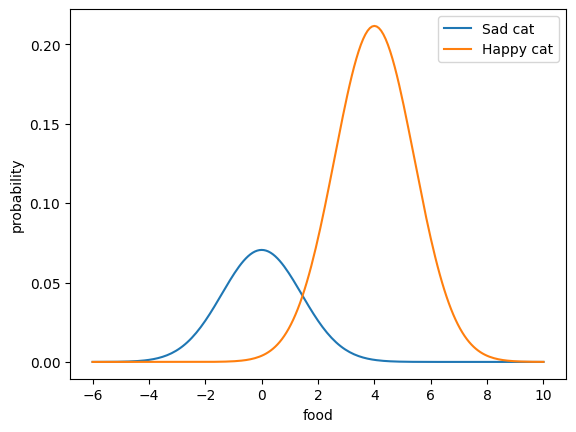

Decision boundary is at x = 1.45069


In [3]:
x = np.linspace(-6, 10, 201)
plt.plot(x, norm.pdf(x, 0, np.sqrt(2))*0.25)
plt.plot(x, norm.pdf(x, 4, np.sqrt(2))*0.75)
plt.xlabel('food')
plt.ylabel('probability')
plt.legend(['Sad cat', 'Happy cat'])
plt.show()

x = np.linspace(1, 2, 100001)
y1 = norm.pdf(x, 0, np.sqrt(2))*0.25
y2 = norm.pdf(x, 4, np.sqrt(2))*0.75
y = np.abs(y1 - y2)
for i in range(len(x)):
    if y[i] < 5e-7:
        print("Decision boundary is at x =", x[i])


### OT3

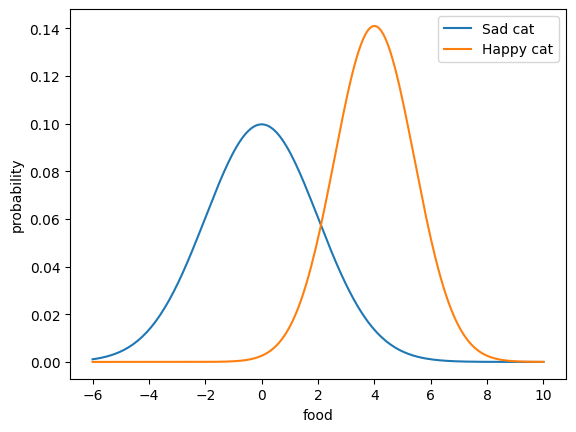

Decision boundary is at x = 2.10317


In [4]:
x = np.linspace(-6, 10, 201)
plt.plot(x, norm.pdf(x, 0, 2)*0.5)
plt.plot(x, norm.pdf(x, 4, np.sqrt(2))*0.5)
plt.xlabel('food')
plt.ylabel('probability')
plt.legend(['Sad cat', 'Happy cat'])
plt.show()

x = np.linspace(1.5, 2.5, 100001)
y1 = norm.pdf(x, 0, 2)*0.5
y2 = norm.pdf(x, 4, np.sqrt(2))*0.5
y = np.abs(y1 - y2)
for i in range(len(x)):
    if y[i] < 5e-7:
        print("Decision boundary is at x =", x[i])
        break

# Employee Attrition Prediction



### read CSV

In [5]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [6]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [7]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [8]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes
# HANDLE NULL NUMBERS
# INSERT CODE HERE

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_yes = df[df['Attrition'] == 1]
df_no = df[df['Attrition'] == 0]
df_yes_train, df_yes_test = train_test_split(df_yes, test_size=0.1)
df_no_train, df_no_test = train_test_split(df_no, test_size=0.1)
df_train = pd.concat([df_yes_train, df_no_train])
df_test = pd.concat([df_yes_test, df_no_test])

print(df_train.shape, df_test.shape)

(1322, 31) (148, 31)


### Display histogram of each feature

In [11]:
def display_histogram(df, col_name, n_bin = 40, clss = [-1]):
    # INSERT CODE HERE
    plt.figure(figsize=(5*len(clss), 5))
    for i, cls in enumerate(clss):
        df2 = df
        if cls != -1:
            df2 = df[df['Attrition'] == cls]
        train_col_no_nan = df2[~np.isnan(df2[col_name])][col_name]
        hist, bin_edge = np.histogram(train_col_no_nan, bins=n_bin)
        hist = hist / hist.sum()
        plt.subplot(1, len(clss), i+1)
        plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor='steelblue')
        plt.title(col_name + (" class " + str(cls) if cls != -1 else ""))
    plt.show()
    
    # print("Empty bins count:", hist[hist == 0].shape[0])


### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

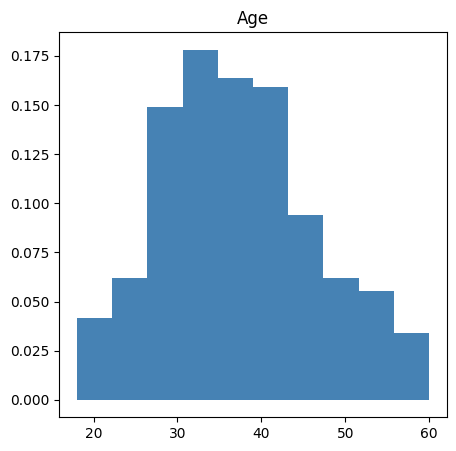

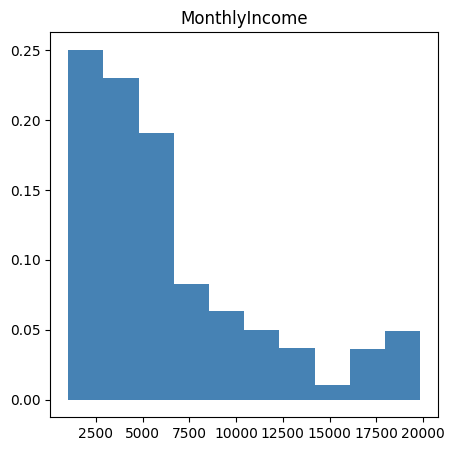

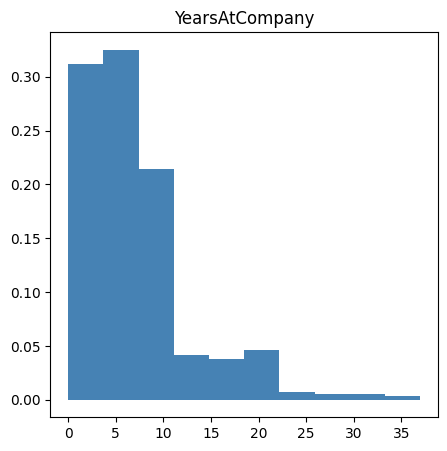

In [12]:
# print(df_train.columns)
bin_size = 10
display_histogram(df_train, 'Age', bin_size)
display_histogram(df_train, 'MonthlyIncome', bin_size)
display_histogram(df_train, 'YearsAtCompany', bin_size)

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

In [13]:
def digitize_column(df, col_name, n_bin, cls = -1):
    if cls != -1:
        df = df[df['Attrition'] == cls]
    train_col_no_nan = df[~np.isnan(df[col_name])][col_name]
    hist, bins = np.histogram(train_col_no_nan, bins=n_bin)
    bins[0] = -np.inf
    bins[-1] = np.inf
    dig = np.digitize(train_col_no_nan, bins)
    return bins, dig
bins, dig = digitize_column(df_train, 'Age', 40)
print(np.min(dig), np.max(dig))
print(np.bincount(dig))


1 40
[ 0 11  9 12 12  8 17 20 21 31 36 49 42 48 43 39 59 50 50 35 39 77 31 35
 26 25 31 27 17 13 19 22 12 14 14 14 17 11  3 12 10]


### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

empty bin 10 count: 0
empty bin 40 count: 0
empty bin 100 count: 57


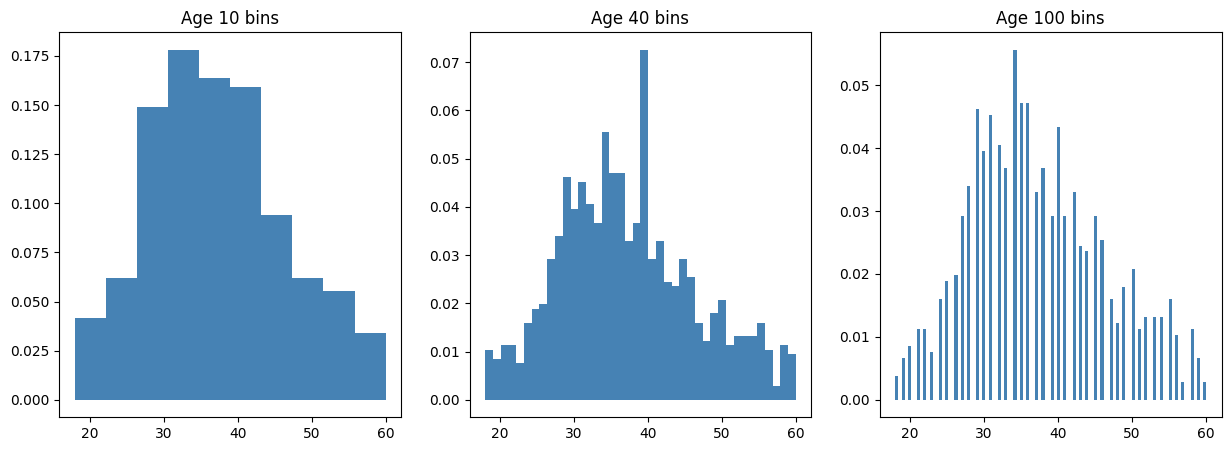

empty bin 10 count: 0
empty bin 40 count: 0
empty bin 100 count: 5


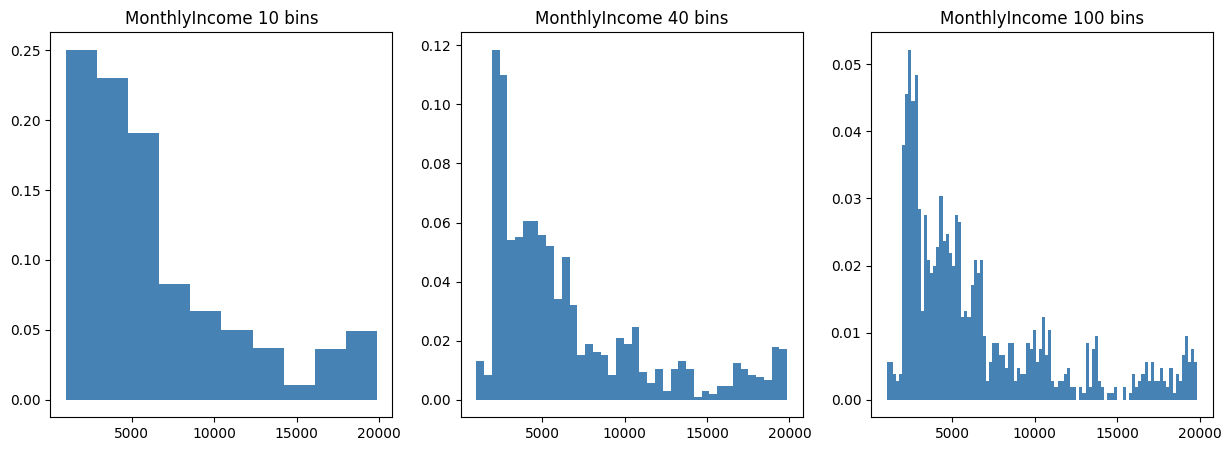

empty bin 10 count: 0
empty bin 40 count: 5
empty bin 100 count: 65


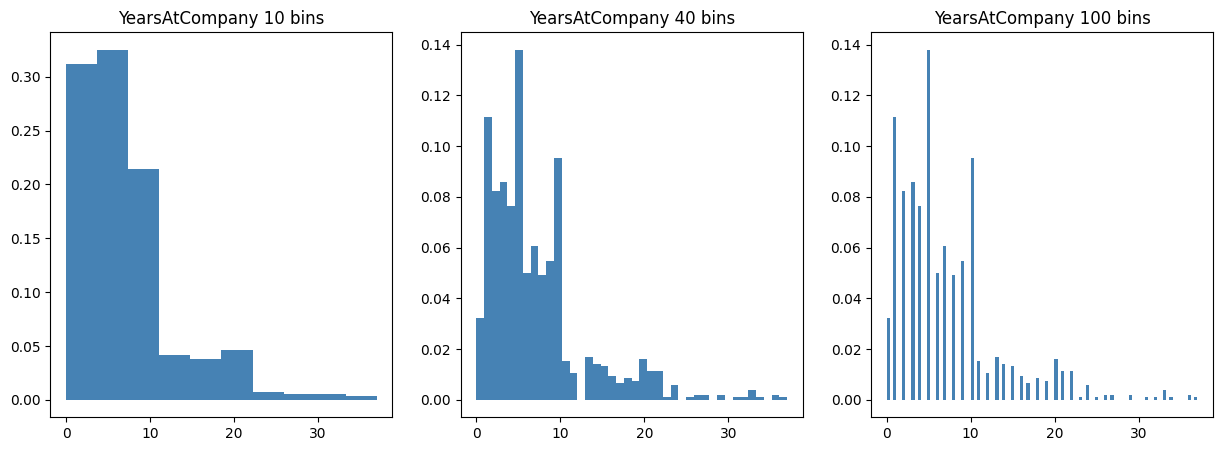

In [14]:
def display_histogram2(df, col_name):
    bin_array = [10, 40, 100]
    plt.figure(figsize=(15, 5))
    for i in range(len(bin_array)):
        n_bin = bin_array[i]
        train_col_no_nan = df[~np.isnan(df[col_name])][col_name]
        hist, bin_edge = np.histogram(train_col_no_nan, bins=n_bin)
        hist = hist / hist.sum()
        plt.subplot(1, 3, i+1)
        plt.title(col_name + " " + str(n_bin) + " bins")
        plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor='steelblue')
        print("empty bin", bin_array[i], "count:", hist[hist == 0].shape[0])
    plt.show()
display_histogram2(df_train, 'Age')
display_histogram2(df_train, 'MonthlyIncome')
display_histogram2(df_train, 'YearsAtCompany')


In [15]:
def fill_digitized(df, col_name, bins):
    out = np.zeros(df.shape[0])
    for idx, i in enumerate(df[col_name]):
        if np.isnan(i):
            out[idx] = np.nan
            continue
        out[idx] = np.digitize(i, bins)
    df[col_name] = out
    return df
# print(df_train['Age'].head(10))
bin_age_size = 40
bin_income_size = 40
bin_year_size = 10
bins_age, hist = digitize_column(df_train, 'Age', 40)
bins_income, hist = digitize_column(df_train, 'MonthlyIncome', 40)
bins_year, hist = digitize_column(df_train, 'YearsAtCompany', 10)
# print(bins_age)
df_train = fill_digitized(df_train, 'Age', bins_age)
df_train = fill_digitized(df_train, 'MonthlyIncome', bins_income)
df_train = fill_digitized(df_train, 'YearsAtCompany', bins_year)
# print(df_train['Age'].head(10))

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

In [16]:
use_feature = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 'JobRole', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']
bin_other_size = 10
# for i in use_feature:
#     display_histogram2(df_train, i)
bins_Distance, hist = digitize_column(df_train, 'DistanceFromHome', bin_other_size)
bins_JobRole, hist = digitize_column(df_train, 'JobRole', bin_other_size)
bins_NumCompaniesWorked, hist = digitize_column(df_train, 'NumCompaniesWorked', bin_other_size)
bins_TotalWorkingYears, hist = digitize_column(df_train, 'TotalWorkingYears', bin_other_size)
bins_YearsAtCompany, hist = digitize_column(df_train, 'YearsAtCompany', bin_other_size)
bins_YearsInCurrentRole, hist = digitize_column(df_train, 'YearsInCurrentRole', bin_other_size)
df_train = fill_digitized(df_train, 'DistanceFromHome', bins_Distance)
df_train = fill_digitized(df_train, 'JobRole', bins_JobRole)
df_train = fill_digitized(df_train, 'NumCompaniesWorked', bins_NumCompaniesWorked)
df_train = fill_digitized(df_train, 'TotalWorkingYears', bins_TotalWorkingYears)
df_train = fill_digitized(df_train, 'YearsAtCompany', bins_YearsAtCompany)
df_train = fill_digitized(df_train, 'YearsInCurrentRole', bins_YearsInCurrentRole)

# print(df_train.head(10))

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

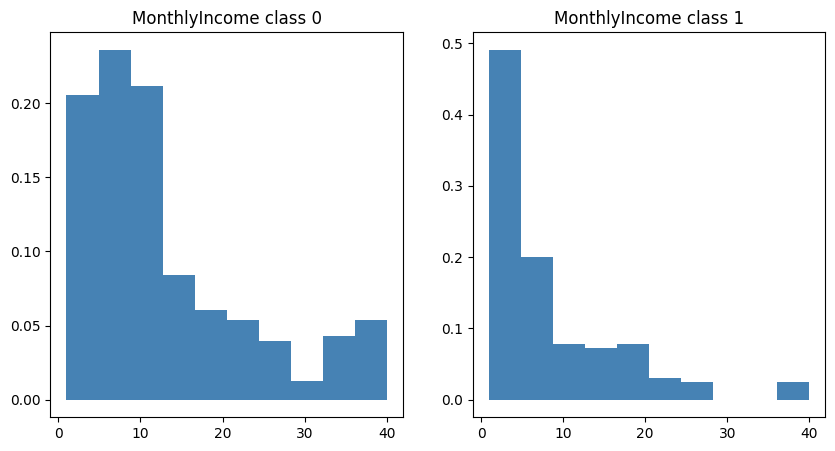

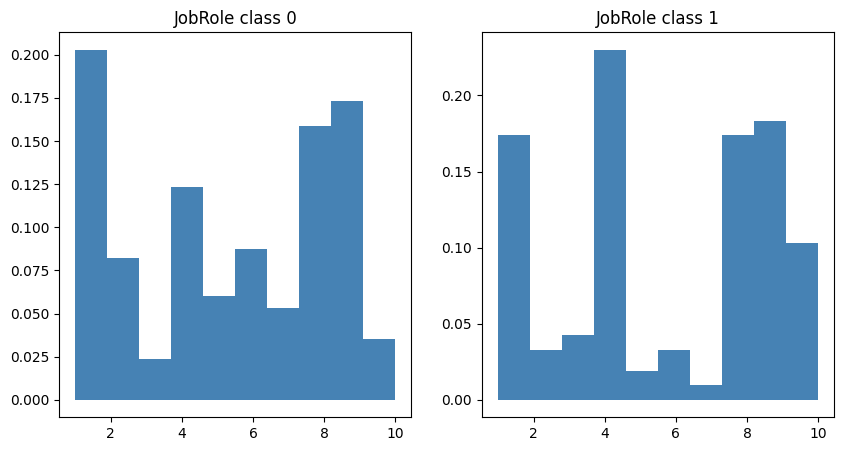

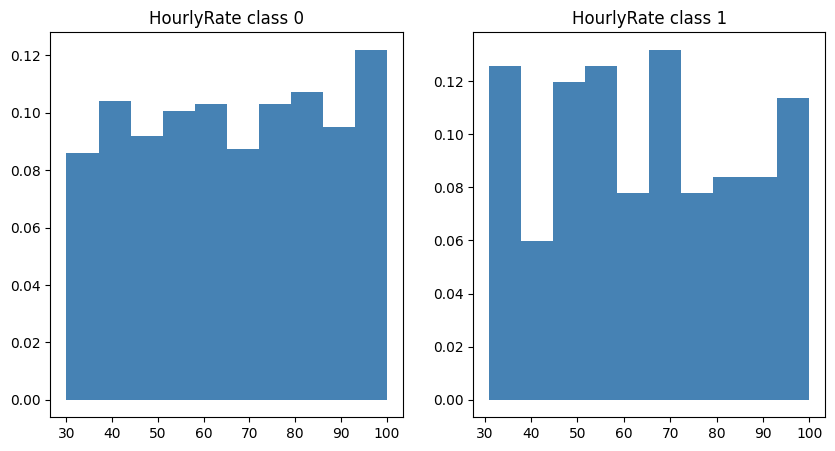

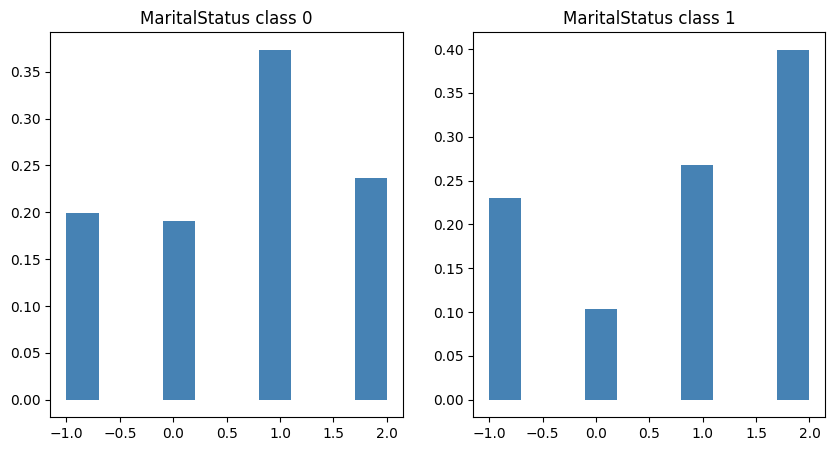

In [17]:
display_histogram(df_train, 'MonthlyIncome', 10, [0,1])
display_histogram(df_train, 'JobRole', 10, [0,1])
display_histogram(df_train, 'HourlyRate', 10, [0,1])
display_histogram(df_train, 'MaritalStatus', 10, [0,1])


### T9. What is the prior distribution of the two classes?

In [18]:
prior_0 = df_train[df_train['Attrition'] == 0].shape[0] / df_train.shape[0]
prior_1 = df_train[df_train['Attrition'] == 1].shape[0] / df_train.shape[0]

print("class 0 prior is", prior_0)
print("class 1 prior is", prior_1)

class 0 prior is 0.8388804841149773
class 1 prior is 0.16111951588502268


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [19]:
from SimpleBayesClassifier import SimpleBayesClassifier

In [20]:
def digitizing(arr, bins):
    out = np.zeros(arr.shape[0])
    for idx, i in enumerate(arr):
        if np.isnan(i):
            out[idx] = np.nan
            continue
        out[idx] = np.digitize(i, bins)
    return out
def prepare_train(df, use_feature, split):
    df_yes = df[df['Attrition'] == 1]
    df_no = df[df['Attrition'] == 0]
    df_yes_train, df_yes_test = train_test_split(df_yes, test_size=split, random_state=42)
    df_no_train, df_no_test = train_test_split(df_no, test_size=split, random_state=42)
    df_train = pd.concat([df_yes_train, df_no_train])
    df_test = pd.concat([df_yes_test, df_no_test])

    df_train = df_train[use_feature + ['Attrition']]
    df_test = df_test[use_feature + ['Attrition']]
    data_train = df_train.to_numpy()
    data_test = df_test.to_numpy()
    bins = []
    for i in range(len(use_feature)):
        d = data_train[:, i][~np.isnan(data_train[:, i])]
        h, b = np.histogram(d, bins=10)
        b[0] = -np.inf
        b[-1] = np.inf
        bins.append(b)
        data_train[:, i] = digitizing(data_train[:, i], bins[i])
        data_test[:, i] = digitizing(data_test[:, i], bins[i])
    return data_train, data_test, bins

In [21]:
data_train, data_test, bins = prepare_train(df, use_feature, 0.1)
print(data_train.shape, data_test.shape)

(1322, 10) (148, 10)


In [22]:
x_train = data_train[:, :-1]
y_train = data_train[:, -1]

x_test = data_test[:, :-1]
y_test = data_test[:, -1]

print(x_train[~np.isnan(x_train)].min(), x_train[~np.isnan(x_train)].max())
print(x_test[~np.isnan(x_test)].min(), x_test[~np.isnan(x_test)].max())

1.0 10.0
1.0 10.0


In [23]:
print(x_train.shape, y_train.shape)

(1322, 9) (1322,)


In [24]:
model = SimpleBayesClassifier(n_pos = prior_1, n_neg = prior_0)

In [25]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (0.375, 0.625)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0, 1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1, 0)
    
check_prior()

In [26]:
a = model.fit_params(x_train, y_train)


In [27]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [5.e-01 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 5.e-01]
EDGES : [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
Feature : 1
BINS : [5.e-01 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 5.e-01]
EDGES : [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Feature : 2
BINS : [5.e-01 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 5.e-01]
EDGES : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
Feature : 3
BINS : [5.e-01 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 5.e-01]
EDGES : [3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]

LEAVE PARAMETERS
Feature : 0
BINS : [5.e-01 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 5.e-01]
EDGES : [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Feature : 1
BINS : [5.e-01 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 5.e-01]
EDGES : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
Feature : 2
BINS : [5.e-01 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 5.e-01]
EDGES

In [28]:
y_pred = model.predict(x = x_test)


In [29]:
def evaluate(y_true, y_pred, show_result = True):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if TP + FP != 0 else 0
    recall = TP / (TP + FN) if TP + FN != 0 else 0
    F1 = 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0
    fpr = FP / (FP + TN) if FP + TN != 0 else 0
    if show_result:
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1: {F1:.2f}")
        print(f"FPR: {fpr:.2f}")
    return accuracy, precision, recall, F1, fpr

In [30]:
evaluate(y_test, y_pred)

Accuracy: 0.89
Precision: 1.00
Recall: 0.33
F1: 0.50
FPR: 0.00


(0.8918918918918919, 1.0, 0.3333333333333333, 0.5, 0.0)

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [31]:
model.fit_gaussian_params(x_train, y_train)

([(5.253968253968254, 4.539286164711817),
  (3.5568053993250843, 6.589393386637481),
  (2.501118568232662, 2.5705474596100415),
  (3.4892655367231638, 7.87233939208017),
  (5.29936880072137, 9.520405738412007),
  (3.69954128440367, 6.157611729636924),
  (3.5946248600223965, 3.916204259336444),
  (2.501118568232662, 2.5705474596100415),
  (3.1314606741573034, 3.639616536696958)],
 [(4.215116279069767, 5.935910512715899),
  (2.3273809523809526, 3.862239806102082),
  (1.9823529411764707, 2.08844413505047),
  (4.0625, 8.641785714285714),
  (5.859154929577465, 10.093276640977944),
  (3.9318181818181817, 7.435324675324674),
  (2.7289156626506026, 3.313946695874407),
  (1.9823529411764707, 2.08844413505047),
  (2.4879518072289155, 2.893793355239138)])

In [32]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 2.0
Feature : 1
Mean : 2.0
STD. : 2.0
Feature : 2
Mean : 3.0
STD. : 2.0
Feature : 3
Mean : 4.0
STD. : 2.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 2.0
Feature : 1
Mean : 3.0
STD. : 2.0
Feature : 2
Mean : 4.0
STD. : 2.0
Feature : 3
Mean : 5.0
STD. : 2.0


In [33]:
y_pred = model.gaussian_predict(x_test)
print(y_pred.shape, y_test.shape)


(148,) (148,)


In [34]:
evaluate(y_test, y_pred)

Accuracy: 0.91
Precision: 0.64
Recall: 0.96
F1: 0.77
FPR: 0.10


(0.9054054054054054,
 0.6388888888888888,
 0.9583333333333334,
 0.7666666666666666,
 0.10483870967741936)

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [35]:
def randon_predict(x):
    return np.random.randint(0, 2, x.shape[0])
y_pred = randon_predict(x_test)
evaluate(y_test, y_pred)

Accuracy: 0.51
Precision: 0.14
Recall: 0.38
F1: 0.20
FPR: 0.46


(0.5135135135135135,
 0.13636363636363635,
 0.375,
 0.19999999999999998,
 0.4596774193548387)

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



### T15. Compare the two baselines with your Naive Bayes classifier.


### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


### T17. Plot the RoC of your classifier.

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.
